In [93]:
import os 
import sys 
import shutil
import json
import glob

In [94]:
missing = 0
exist = 0

for output_dir in os.listdir('./stem_output_context_2'):
    output_dir = os.path.join('./stem_output_context_2', output_dir)
    if os.path.isdir(output_dir):
        if not os.path.exists(os.path.join(output_dir, 'summary.json')):
            print('Missing index.html in {}'.format(output_dir))
            missing += 1
        else:
            with open(os.path.join(output_dir, 'summary.json'), 'r') as f:
                summary = json.load(f)

            if summary['time_spent'] < 1600:
                print(f'Time spent less than 1600 seconds in {output_dir} (time spent: {summary["time_spent"]})')
                missing += 1
            else:
                print(os.path.basename(output_dir))
                exist += 1

print('Missing: {}'.format(missing))
print('Exist: {}'.format(exist))

oss.krtirtho.spotube_31
org.asafonov.monly_47
lying.fengfeng.foodrecords_1
galaxy_store
familyfinance
org.tasks_130909
com.ichi2.anki_21803300
luci.sixsixsix.powerampache2.fdroid_59
moe.dic1911.urlsanitizer_30
com.nextcloud.talk2_190000190
com.moimob.drinkable_15000
com.money.manager.ex_1032
aeroflot
Missing: 0
Exist: 13


In [95]:
import xml.etree.ElementTree as ET
import glob

def extract_activity_names(manifest_file):
    # Parse the XML file
    tree = ET.parse(manifest_file)
    root = tree.getroot()

    # Namespace dictionary to handle Android namespace
    namespaces = {'android': 'http://schemas.android.com/apk/res/android'}

    # Find all activity elements and extract their android:name attributes
    activities = root.findall(".//activity", namespaces)
    activity_names = [activity.get('{http://schemas.android.com/apk/res/android}name') for activity in activities]

    return activity_names

appname2activities = {}

for manifest_file in glob.glob('rq2_targets/*/AndroidManifest.xml'):
    app_name = os.path.basename(os.path.dirname(manifest_file))

    appname2activities[app_name] = {
        'raw': [],
        'last': []
    }

    # Extract activity names
    for name in extract_activity_names(manifest_file):
        appname2activities[app_name]['raw'].append(name)
        appname2activities[app_name]['last'].append(name.split('.')[-1])
        

# with open('activities_map.json', 'w') as f:
#     json.dump(appname2activities, f, indent=2)


In [96]:
with open('activities_map.json') as f:
    activities_map = json.load(f)

def is_valid_activity(app_name, activity_name):
    valid_activities = activities_map[app_name]['last']

    activity_name_cleaned = activity_name.split('.')[-1]
    if activity_name_cleaned in valid_activities:
        return True
    else:
        return False


In [130]:
missing = []

results = []
full_results = []
time_results = []

INCLUDE_MULTI_RUN_RESULTS = True

for output_dir in glob.glob('./stem_output_droidfiller/*'):
    output_dir_2 = output_dir.replace('stem_output_droidfiller', 'stem_output_droidfiller_2')
    output_dir_3 = output_dir.replace('stem_output_droidfiller', 'stem_output_droidfiller_3')

    if os.path.isdir(output_dir):
        app_id = os.path.basename(output_dir)
        if not os.path.exists(os.path.join(output_dir, 'summary.json')):
            print('Missing index.html in {}'.format(output_dir))
            missing.append(app_id)
        elif INCLUDE_MULTI_RUN_RESULTS and not os.path.exists(os.path.join(output_dir_2, 'summary.json')):
            print('Missing index.html in {}'.format(output_dir_2))
            missing.append(app_id)
        elif INCLUDE_MULTI_RUN_RESULTS and not os.path.exists(os.path.join(output_dir_3, 'summary.json')):
            print('Missing index.html in {}'.format(output_dir_3))
            missing.append(app_id)
        else:
            summary = []
            
            with open(os.path.join(output_dir, 'summary.json'), 'r') as f:
                summary = json.load(f)

            with open(os.path.join(output_dir, 'utg.json'), 'r') as f:
                utg = json.load(f)

            if INCLUDE_MULTI_RUN_RESULTS:
                with open(os.path.join(output_dir_2, 'summary.json'), 'r') as f:
                    summary_2 = json.load(f)

                with open(os.path.join(output_dir_2, 'utg.json'), 'r') as f:
                    utg_2 = json.load(f)

                state2activity_2 = {}
                for node in utg_2['nodes']:
                    if 'activity' not in node:
                        continue
                    state2activity_2[node['id']] = node['activity'].split('.')[-1]


                with open(os.path.join(output_dir_3, 'summary.json'), 'r') as f:
                    summary_3 = json.load(f)

                with open(os.path.join(output_dir_3, 'utg.json'), 'r') as f:
                    utg_3 = json.load(f)

                state2activity_3 = {}
                for node in utg_3['nodes']:
                    if 'activity' not in node:
                        continue
                    state2activity_3[node['id']] = node['activity'].split('.')[-1]

            state2activity = {}
            for node in utg['nodes']:
                if 'activity' not in node:
                    continue
                state2activity[node['id']] = node['activity'].split('.')[-1]

            if summary['time_spent'] < 1000:
                print(f'Time spent less than 1600 seconds in {output_dir} (time spent: {summary["time_spent"]})')
                missing.append(app_id)
            elif INCLUDE_MULTI_RUN_RESULTS and summary_2['time_spent'] < 1000:
                print(f'Time spent less than 1600 seconds in {output_dir_2} (time spent: {summary_2["time_spent"]})')
                missing.append(app_id)
            elif INCLUDE_MULTI_RUN_RESULTS and summary_3['time_spent'] < 1000:
                print(f'Time spent less than 1600 seconds in {output_dir_3} (time spent: {summary_3["time_spent"]})')
                missing.append(app_id)
            else:
                num_set_text = [0, 0, 0]
                reached_activities = [set(), set(), set()]
                reached_activities_context = [set(), set(), set()]
                covered_states = [set(), set(), set()]

                with open(f'./stem_output_context/{app_id}/summary.json') as f:
                    summary_context = json.load(f)

                with open(f'./stem_output_context/{app_id}/utg.json') as f:
                    utg_context = json.load(f)

                state2activity_context = {}
                for node in utg_context['nodes']:
                    if 'activity' not in node:
                        continue
                    state2activity_context[node['id']] = node['activity'].split('.')[-1]

                min_event_count = min(summary['num_input_events'], summary_context['num_input_events'])

                if INCLUDE_MULTI_RUN_RESULTS:
                    with open(f'./stem_output_context_2/{app_id}/summary.json') as f:
                        summary_context_2 = json.load(f)

                    with open(f'./stem_output_context_2/{app_id}/utg.json') as f:
                        utg_context_2 = json.load(f)

                    state2activity_context_2 = {}
                    for node in utg_context_2['nodes']:
                        if 'activity' not in node:
                            continue
                        state2activity_context_2[node['id']] = node['activity'].split('.')[-1]

                    with open(f'./stem_output_context_3/{app_id}/summary.json') as f:
                        summary_context_3 = json.load(f)

                    with open(f'./stem_output_context_3/{app_id}/utg.json') as f:
                        utg_context_3 = json.load(f)

                    state2activity_context_3 = {}
                    for node in utg_context_3['nodes']:
                        if 'activity' not in node:
                            continue
                        state2activity_context_3[node['id']] = node['activity'].split('.')[-1]

                    min_event_count = min(summary['num_input_events'], summary_context['num_input_events'], summary_2['num_input_events'], summary_context_2['num_input_events'], summary_3['num_input_events'], summary_context_3['num_input_events'])

                with open(os.path.join(output_dir, 'app_info.json')) as f:
                    package_name = json.load(f)['app_package']

                with open(os.path.join(output_dir, 'eventlist.json')) as f:
                    eventlist = json.load(f)
                    for i, event in enumerate(eventlist):
                        if i >= min_event_count:
                            break

                        if event['event']['event_type'] == 'set_text':
                            num_set_text[0] += 1

                        from_state = event['from']
                        to_state = event['to']

                        if from_state in state2activity:
                            reached_activities[0].add(state2activity[from_state])
                            if is_valid_activity(app_id, state2activity[from_state]):
                                covered_states[0].add(from_state)

                        if to_state in state2activity:
                            reached_activities[0].add(state2activity[to_state])
                            if is_valid_activity(app_id, state2activity[to_state]):
                                covered_states[0].add(to_state)

                        time_results.append({
                            'technique': 'DroidFiller',
                            'app_id': app_id,
                            'event_no': i+1,
                            'num_covered_activities': len([a for a in reached_activities[0] if is_valid_activity(app_id, a)]),
                        })

                if INCLUDE_MULTI_RUN_RESULTS:
                    with open(os.path.join(output_dir_2, 'app_info.json')) as f:
                        package_name = json.load(f)['app_package']

                    with open(os.path.join(output_dir_2, 'eventlist.json')) as f:
                        eventlist = json.load(f)
                        for i, event in enumerate(eventlist):
                            if i >= min_event_count:
                                break

                            if event['event']['event_type'] == 'set_text':
                                num_set_text[1] += 1

                            from_state = event['from']
                            to_state = event['to']

                            if from_state in state2activity_2:
                                reached_activities[1].add(state2activity_2[from_state])
                                if is_valid_activity(app_id, state2activity_2[from_state]):
                                    covered_states[1].add(from_state)
                            if to_state in state2activity_2:
                                reached_activities[1].add(state2activity_2[to_state])
                                if is_valid_activity(app_id, state2activity_2[to_state]):
                                    covered_states[1].add(to_state)

                    with open(os.path.join(output_dir_3, 'app_info.json')) as f:
                        package_name = json.load(f)['app_package']

                    with open(os.path.join(output_dir_3, 'eventlist.json')) as f:
                        eventlist = json.load(f)
                        for i, event in enumerate(eventlist):
                            if i >= min_event_count:
                                break

                            if event['event']['event_type'] == 'set_text':
                                num_set_text[2] += 1

                            from_state = event['from']
                            to_state = event['to']

                            if from_state in state2activity_3:
                                reached_activities[2].add(state2activity_3[from_state])
                                if is_valid_activity(app_id, state2activity_3[from_state]):
                                    covered_states[2].add(from_state)
                            if to_state in state2activity_3:
                                reached_activities[2].add(state2activity_3[to_state])
                                if is_valid_activity(app_id, state2activity_3[to_state]):
                                    covered_states[2].add(to_state)


                internal_activities_1 = [a for a in reached_activities[0] if is_valid_activity(app_id, a)]
                internal_activities_2 = [a for a in reached_activities[1] if is_valid_activity(app_id, a)]
                internal_activities_3 = [a for a in reached_activities[2] if is_valid_activity(app_id, a)]
                
                internal_activities = internal_activities_1

                ra = reached_activities[0]
                cs = covered_states[0]
                nst = num_set_text[0]

                if INCLUDE_MULTI_RUN_RESULTS:
                    if len(internal_activities_2) > len(internal_activities_1) and len(internal_activities_2) > internal_activities_3:
                        ra = reached_activities[1]
                        cs = covered_states[1]
                        nst = num_set_text[1]
                        internal_activities = internal_activities_2
                    elif len(internal_activities_3) > len(internal_activities_1) and len(internal_activities_3) > internal_activities_2:
                        ra = reached_activities[2]
                        cs = covered_states[2]
                        nst = num_set_text[2]
                        internal_activities = internal_activities_3

                
                results.append({
                    'technique': 'STEM+DroidFiller',
                    'app': app_id,
                    'num_all_activities': len(activities_map[app_id]['raw']),
                    'num_nodes': min_event_count,
                    # 'num_internal_activities': len(internal_activities),
                    'num_reached_activities': len(ra),
                    'num_internal_activities': len(internal_activities),
                    'num_covered_states': len(cs),
                    'reached_activities': list(ra),
                    'internal_activities': internal_activities,
                    # 'dynamic_coverage': summary['dynamic_coverage_auc'],
                    'num_set_text': nst
                })

                for i in range(3):
                    ia = internal_activities_1
                    if i == 1:
                        ia = internal_activities_2
                    elif i == 2:
                        ia = internal_activities_3
                    full_results.append({
                        'technique': 'STEM+DroidFiller',
                        'app': app_id,
                        'num_all_activities': len(activities_map[app_id]['raw']),
                        'num_nodes': min_event_count,
                        # 'num_internal_activities': len(internal_activities),
                        'num_reached_activities': len(reached_activities[i]),
                        'num_internal_activities': len(ia),
                        'num_covered_states': len(covered_states[i]),
                        'reached_activities': list(reached_activities[i]),
                        'internal_activities': ia,
                        # 'dynamic_coverage': summary['dynamic_coverage_auc'],
                        'num_set_text': nst
                    })

                
                num_set_text = [0, 0, 0]
                covered_states = [set(), set(), set()]

                with open(f'./stem_output_context/{app_id}/eventlist.json') as f:
                    eventlist_context = json.load(f)
                    for i, event in enumerate(eventlist_context):
                        if i >= min_event_count:
                            break

                        if event['event']['event_type'] == 'set_text':
                            num_set_text[0] += 1
                        
                        from_state = event['from']
                        to_state = event['to']

                        if from_state in state2activity_context:
                            reached_activities_context[0].add(state2activity_context[from_state])
                            if is_valid_activity(app_id, state2activity_context[from_state]):
                                covered_states[0].add(from_state)
                        if to_state in state2activity_context:
                            reached_activities_context[0].add(state2activity_context[to_state])
                            if is_valid_activity(app_id, state2activity_context[to_state]):
                                covered_states[0].add(to_state)

                        time_results.append({
                            'technique': 'Context',
                            'app_id': app_id,
                            'event_no': i+1,
                            'num_covered_activities': len([a for a in reached_activities_context[0] if is_valid_activity(app_id, a)]),
                        })


                if INCLUDE_MULTI_RUN_RESULTS:
                    with open(f'./stem_output_context_2/{app_id}/eventlist.json') as f:
                        eventlist_context = json.load(f)
                        for i, event in enumerate(eventlist_context):
                            if i >= min_event_count:
                                break

                            if event['event']['event_type'] == 'set_text':
                                num_set_text[1] += 1
                            
                            from_state = event['from']
                            to_state = event['to']

                            if from_state in state2activity_context_2:
                                reached_activities_context[1].add(state2activity_context_2[from_state])
                                if is_valid_activity(app_id, state2activity_context_2[from_state]):
                                    covered_states[1].add(from_state)
                            if to_state in state2activity_context_2:
                                reached_activities_context[1].add(state2activity_context_2[to_state])
                                if is_valid_activity(app_id, state2activity_context_2[to_state]):
                                    covered_states[1].add(to_state)

                    with open(f'./stem_output_context_3/{app_id}/eventlist.json') as f:
                        eventlist_context = json.load(f)
                        for i, event in enumerate(eventlist_context):
                            if i >= min_event_count:
                                break

                            if event['event']['event_type'] == 'set_text':
                                num_set_text[2] += 1
                            
                            from_state = event['from']
                            to_state = event['to']

                            if from_state in state2activity_context_3:
                                reached_activities_context[2].add(state2activity_context_3[from_state])
                                if is_valid_activity(app_id, state2activity_context_3[from_state]):
                                    covered_states[2].add(from_state)
                            if to_state in state2activity_context_3:
                                reached_activities_context[2].add(state2activity_context_3[to_state])
                                if is_valid_activity(app_id, state2activity_context_3[to_state]):
                                    covered_states[2].add(to_state)


                internal_activities_1 = [a for a in reached_activities_context[0] if is_valid_activity(app_id, a)]
                internal_activities_2 = [a for a in reached_activities_context[1] if is_valid_activity(app_id, a)]
                internal_activities_3 = [a for a in reached_activities_context[2] if is_valid_activity(app_id, a)]

                internal_activities = internal_activities_1

                ra_context = reached_activities_context[0]
                cs_context = covered_states[0]
                nst_context = num_set_text[0]

                if INCLUDE_MULTI_RUN_RESULTS:
                    if len(internal_activities_2) > len(internal_activities_1) and len(internal_activities_2) > len(internal_activities_3):
                        ra_context = reached_activities_context[1]
                        cs_context = covered_states[1]
                        nst_context = num_set_text[1]
                        internal_activities = internal_activities_2


                    if len(internal_activities_3) > len(internal_activities_1) and len(internal_activities_3) > len(internal_activities_2):
                        ra_context = reached_activities_context[2]
                        cs_context = covered_states[2]
                        nst_context = num_set_text[2]
                        internal_activities = internal_activities_3


                print(app_id)
                print('reached_activities (DroidFiller)', ra, f'({len(ra)})')
                print('reached_activities (Context)', ra_context, f'({len(ra_context)})')
                print('internal_activities (DroidFiller)', [a for a in ra if is_valid_activity(app_id, a)], f'({len([a for a in ra if is_valid_activity(app_id, a)])})')
                print('internal_activities (Context)', [a for a in ra_context if is_valid_activity(app_id, a)], f'({len([a for a in ra_context if is_valid_activity(app_id, a)])})')
                print()
                print('---')
                print()
                
                results.append({
                    'technique': 'STEM+Context',
                    'app': app_id,
                    'num_all_activities': len(activities_map[app_id]['raw']),
                    'num_nodes': min_event_count,
                    # 'num_internal_activities': len(internal_activities_context),
                    'num_reached_activities': len(ra_context),
                    'num_internal_activities': len(internal_activities),
                    'num_covered_states': len(cs_context),
                    'reached_activities': list(ra_context),
                    'internal_activities': internal_activities,
                    # 'dynamic_coverage': summary_context['dynamic_coverage_auc'],
                    'num_set_text': nst_context
                })

                for i in range(3):
                    ia = internal_activities_1
                    if i == 1:
                        ia = internal_activities_2
                    elif i == 2:
                        ia = internal_activities_3
                    full_results.append({
                        'technique': 'STEM+Context',
                        'app': app_id,
                        'num_all_activities': len(activities_map[app_id]['raw']),
                        'num_nodes': min_event_count,
                        # 'num_internal_activities': len(internal_activities),
                        'num_reached_activities': len(reached_activities_context[i]),
                        'num_internal_activities': len(ia),
                        'num_covered_states': len(covered_states[i]),
                        'reached_activities': list(reached_activities_context[i]),
                        'internal_activities': ia,
                        # 'dynamic_coverage': summary['dynamic_coverage_auc'],
                        'num_set_text': nst
                    })
                

print('Missing: {}'.format(missing))
# missing: phone

oss.krtirtho.spotube_31
reached_activities (DroidFiller) {'HomeDashboardActivity', 'Settings$WifiSettingsActivity', 'Settings$UsbDetailsActivity', 'RequestIgnoreBatteryOptimizations', 'LauncherActivity', 'AudioServiceActivity', 'CustomControlsActivity', 'InternalGoogleAppActivityEntrypoint', 'BluetoothScanDialog'} (9)
reached_activities (Context) {'FeedbackAlohaActivity', 'RequestIgnoreBatteryOptimizations', 'LauncherActivity', 'AudioServiceActivity', 'BatteryActivity', 'CustomControlsActivity', 'InternalGoogleAppActivityEntrypoint', 'CustomTabActivity'} (8)
internal_activities (DroidFiller) ['AudioServiceActivity'] (1)
internal_activities (Context) ['AudioServiceActivity'] (1)

---

org.asafonov.monly_47
reached_activities (DroidFiller) {'LauncherActivity', 'MainActivity'} (2)
reached_activities (Context) {'LauncherActivity', 'MainActivity'} (2)
internal_activities (DroidFiller) ['MainActivity'] (1)
internal_activities (Context) ['MainActivity'] (1)

---

lying.fengfeng.foodrecords_1


In [131]:
import pandas as pd

result_df = pd.DataFrame(results)
result_df.to_csv('stem_integration.csv', index=False)
result_df

,technique,app,num_all_activities,num_nodes,num_reached_activities,num_internal_activities,num_covered_states,reached_activities,internal_activities,num_set_text
0,STEM+DroidFiller,oss.krtirtho.spotube_31,7,1188,9,1,190,"[HomeDashboardActivity, Settings$WifiSettingsA...",[AudioServiceActivity],12
1,STEM+Context,oss.krtirtho.spotube_31,7,1188,8,1,197,"[FeedbackAlohaActivity, RequestIgnoreBatteryOp...",[AudioServiceActivity],14
2,STEM+DroidFiller,org.asafonov.monly_47,1,896,2,1,152,"[LauncherActivity, MainActivity]",[MainActivity],238
3,STEM+Context,org.asafonov.monly_47,1,896,2,1,160,"[LauncherActivity, MainActivity]",[MainActivity],265
4,STEM+DroidFiller,lying.fengfeng.foodrecords_1,2,386,3,1,93,"[LauncherActivity, MainActivity, AppErrorDialo...",[MainActivity],2
5,STEM+Context,lying.fengfeng.foodrecords_1,2,386,2,1,78,"[LauncherActivity, MainActivity]",[MainActivity],2
6,STEM+DroidFiller,familyfinance,30,1689,31,27,181,"[IncomeOperationActivity, ExpenseArticleEditAc...","[IncomeOperationActivity, ExpenseArticleEditAc...",82
7,STEM+Context,familyfinance,30,1689,22,20,187,"[ExpenseArticleEditActivity, ExpenseOperationA...","[ExpenseArticleEditActivity, ExpenseOperationA...",57
8,STEM+DroidFiller,org.tasks_130909,46,1775,8,4,434,"[SortSettingsActivity, Camera, GoogleTTSActivi...","[SortSettingsActivity, CustomRecurrenceActivit...",6
9,STEM+Context,org.tasks_130909,46,1775,10,4,22,"[SortSettingsActivity, ConversationComposer, M...","[SortSettingsActivity, LocationPickerActivity,...",10


In [132]:
full_result_df = pd.DataFrame(full_results)
full_result_df

,technique,app,num_all_activities,num_nodes,num_reached_activities,num_internal_activities,num_covered_states,reached_activities,internal_activities,num_set_text
0,STEM+DroidFiller,oss.krtirtho.spotube_31,7,1188,9,1,190,"[HomeDashboardActivity, Settings$WifiSettingsA...",[AudioServiceActivity],12
1,STEM+DroidFiller,oss.krtirtho.spotube_31,7,1188,5,1,124,"[HomeDashboardActivity, RequestIgnoreBatteryOp...",[AudioServiceActivity],12
2,STEM+DroidFiller,oss.krtirtho.spotube_31,7,1188,8,1,155,"[HomeDashboardActivity, ResolverActivity, Requ...",[AudioServiceActivity],12
3,STEM+Context,oss.krtirtho.spotube_31,7,1188,8,1,197,"[FeedbackAlohaActivity, RequestIgnoreBatteryOp...",[AudioServiceActivity],12
4,STEM+Context,oss.krtirtho.spotube_31,7,1188,17,1,142,"[NfcAntennaGuideDialog, FreActivity, HomeDashb...",[AudioServiceActivity],12
...,...,...,...,...,...,...,...,...,...,...
67,STEM+DroidFiller,aeroflot,33,1597,18,10,615,"[ContactPickerActivity, ResolverActivity, Book...","[BookingDetailsActivity, GiftCertificateActivi...",66
68,STEM+DroidFiller,aeroflot,33,1597,9,8,586,"[BookingDetailsActivity, GiftCertificateActivi...","[BookingDetailsActivity, GiftCertificateActivi...",66
69,STEM+Context,aeroflot,33,1597,9,8,554,"[BookingDetailsActivity, GiftCertificateActivi...","[BookingDetailsActivity, GiftCertificateActivi...",66
70,STEM+Context,aeroflot,33,1597,10,8,479,"[ResolverActivity, BookingDetailsActivity, Gif...","[BookingDetailsActivity, GiftCertificateActivi...",66


In [114]:
result_df.groupby('technique').describe()[['num_reached_activities', 'num_covered_states']]

num_reached_activities                                        \
                                  count       mean        std  min   25%  50%   
technique                                                                       
STEM+Context                       12.0   8.666667   7.113794  2.0  2.75  7.0   
STEM+DroidFiller                   12.0  10.666667  10.368951  2.0  3.75  7.0   

                              num_covered_states                            \
                    75%   max              count    mean         std   min   
technique                                                                    
STEM+Context      11.50  22.0               12.0  230.00  301.843126   7.0   
STEM+DroidFiller  12.25  31.0               12.0  283.75  300.631192  33.0   

                                                
                    25%    50%     75%     max  
technique                                       
STEM+Context      28.75  157.0  231.00  1055.0  
STEM+DroidFiller  91.00  199.0  347.75  1092.0

In [133]:
import scipy.stats as stats

stats.wilcoxon(full_result_df[full_result_df.technique == 'STEM+Context']['num_internal_activities'], full_result_df[full_result_df.technique == 'STEM+DroidFiller']['num_internal_activities'], alternative='less')

WilcoxonResult(statistic=31.0, pvalue=0.015048201117169315)

In [134]:
import scipy.stats as stats

stats.wilcoxon(full_result_df[full_result_df.technique == 'STEM+Context']['num_covered_states'], full_result_df[full_result_df.technique == 'STEM+DroidFiller']['num_covered_states'], alternative='less')

WilcoxonResult(statistic=259.5, pvalue=0.12406457752193845)

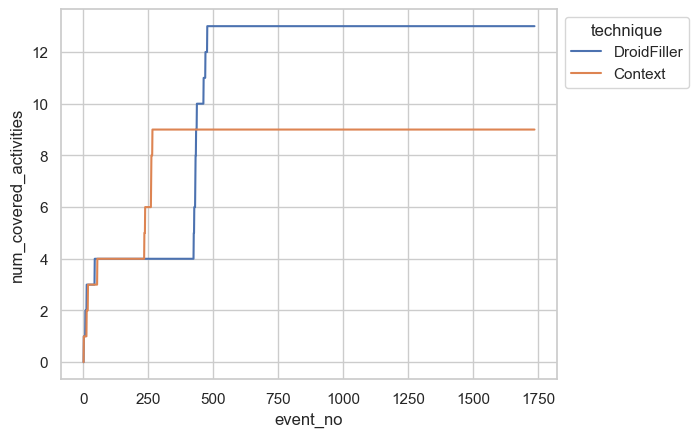

In [117]:
import seaborn as sns
df_time = pd.DataFrame(time_results)

# com.money.manager.ex_1032	
# familyfinance
# com.ichi2.anki_21803300
ax = sns.lineplot(data=df_time[df_time.app_id == 'com.money.manager.ex_1032'], x='event_no', y='num_covered_activities', hue='technique')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

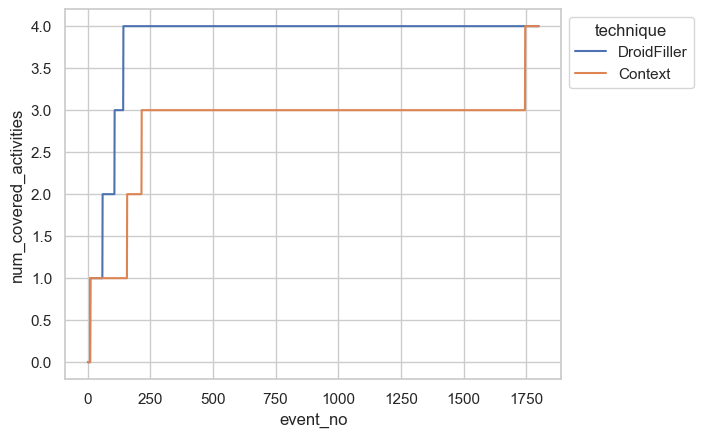

In [118]:
df_time = pd.DataFrame(time_results)


# org.tasks_130909
ax = sns.lineplot(data=df_time[df_time.app_id == 'org.tasks_130909'], x='event_no', y='num_covered_activities', hue='technique')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

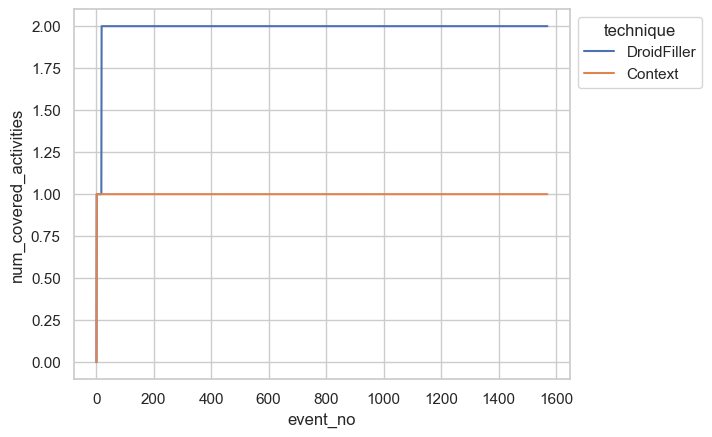

In [119]:
df_time = pd.DataFrame(time_results)

ax = sns.lineplot(data=df_time[df_time.app_id == 'com.nextcloud.talk2_190000190'], x='event_no', y='num_covered_activities', hue='technique')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [120]:
abbr_map = {
    'oss.krtirtho.spotube_31': 'Spotube',
    'luci.sixsixsix.powerampache2.fdroid_59': 'AmpachePlayer',
    'com.money.manager.ex_1032': 'MoneyManager',
    'com.nextcloud.talk2_190000190': 'NextCloudTalk',
    'lying.fengfeng.foodrecords_1': 'FoodRecords',
    'org.asafonov.monly_47': 'Monly',
    'org.tasks_130909': 'Tasks',
    'com.ichi2.anki_21803300': 'AnkiDroid',
    'com.moimob.drinkable_15000': 'Drinkable',
    'moe.dic1911.urlsanitizer_30': 'URLSanitizer',
    'aeroflot': 'Aeroflot',
    'familyfinance': 'FamilyFinance'
}

result_df['activity_coverage'] = result_df.apply(lambda x: x['num_internal_activities'] / x['num_all_activities'], axis=1)
result_df['name'] = result_df.apply(lambda x: abbr_map[x['app']], axis=1)

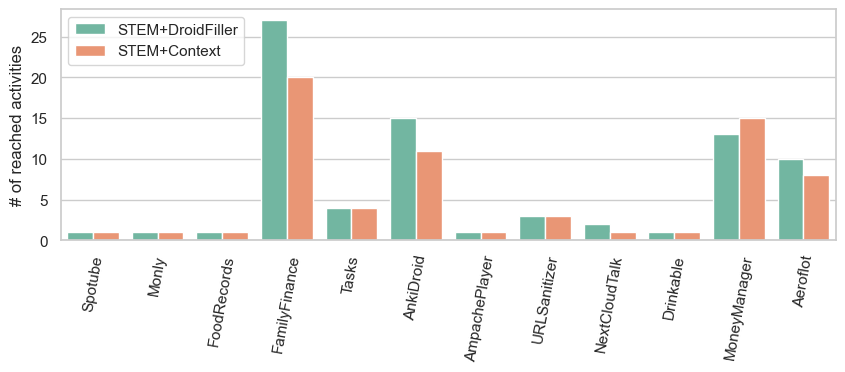

In [121]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))

sns.set(style="whitegrid")

ax = sns.barplot(x="name", y="num_internal_activities", hue="technique", data=result_df, palette="Set2")
ax.set_xlabel('')
ax.set_ylabel('# of reached activities')
# x label rotation 
plt.xticks(rotation=80)

# hide legend title 
plt.legend(title='', loc='upper left')
# plt.savefig('/Users/greenmon/Dropbox/COINSE/DroidFiller/figures/RQ4_activity_coverage.pdf', bbox_inches='tight')
plt.savefig('/Users/greenmon/Dropbox/COINSE/DroidFiller/figures/RQ4_activity_coverage.pdf', bbox_inches='tight')

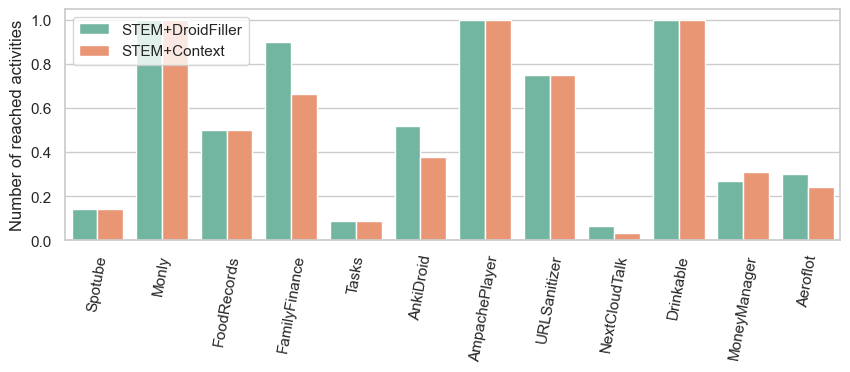

In [122]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))

sns.set(style="whitegrid")

ax = sns.barplot(x="name", y="activity_coverage", hue="technique", data=result_df, palette="Set2")
ax.set_xlabel('')
ax.set_ylabel('Number of reached activities')
# x label rotation 
plt.xticks(rotation=80)

# hide legend title 
plt.legend(title='', loc='upper left')



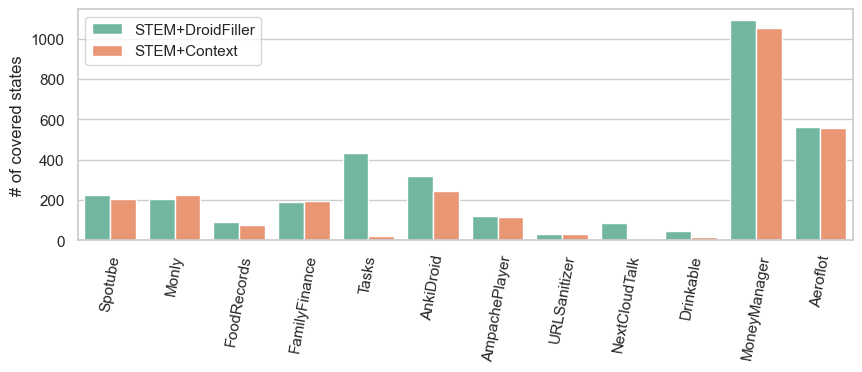

In [123]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))

sns.set(style="whitegrid")

ax = sns.barplot(x="name", y="num_covered_states", hue="technique", data=result_df, palette="Set2")
# ax.set_title('State Coverage Comparison')
ax.set_xlabel('')
ax.set_ylabel('# of covered states')
# x label rotation 
plt.xticks(rotation=80)

# hide legend title 
plt.legend(title='', loc='upper left')
plt.savefig('/Users/greenmon/Dropbox/COINSE/DroidFiller/figures/RQ4_state_coverage.pdf', bbox_inches='tight')


In [124]:
delta_results = []

for app, group_df in result_df.groupby('app'):
    droidfiller_AC = group_df[group_df.technique == 'STEM+DroidFiller'].num_internal_activities.tolist()[0]
    droidfiller_CC = group_df[group_df.technique == 'STEM+DroidFiller'].num_covered_states.tolist()[0]

    context_AC = group_df[group_df.technique == 'STEM+Context'].num_internal_activities.tolist()[0]
    context_CC = group_df[group_df.technique == 'STEM+Context'].num_covered_states.tolist()[0]

    delta_results.append({
        'app': app,
        'AC_delta_absolute': (droidfiller_AC - context_AC),
        'CC_delta_absolute': (droidfiller_CC - context_CC),
        'AC_delta': round((droidfiller_AC - context_AC) / context_AC * 100, 2),
        'CC_delta': round((droidfiller_CC - context_CC) / context_CC * 100, 2),
    })

pd.DataFrame(delta_results)

,app,AC_delta_absolute,CC_delta_absolute,AC_delta,CC_delta
0,aeroflot,2,4,25.00,0.72
1,com.ichi2.anki_21803300,4,73,36.36,29.67
2,com.moimob.drinkable_15000,0,26,0.00,144.44
3,com.money.manager.ex_1032,-2,37,-13.33,3.51
4,com.nextcloud.talk2_190000190,1,78,100.00,1114.29
5,familyfinance,7,-6,35.00,-3.05
6,luci.sixsixsix.powerampache2.fdroid_59,0,3,0.00,2.56
7,lying.fengfeng.foodrecords_1,0,15,0.00,19.23
8,moe.dic1911.urlsanitizer_30,0,2,0.00,6.45
9,org.asafonov.monly_47,0,-19,0.00,-8.41
